# PYTHON PROGRAMMING 


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 기온데이터 분석

### 1907년부터 2018년3월까지의 서울 기온 데이터를 CSV로 다운로드 한다.
### seoul.csv 파일을 열어 실행한다. encoding='cp949'

In [20]:
temp = pd.read_csv('seoul.csv', encoding='cp949')
temp.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3


In [22]:
temp['날짜'].unique()

array(['1907-10-01', '1907-10-02', '1907-10-03', ..., '2018-03-26',
       '2018-03-27', '2018-03-28'], dtype=object)

## 실습 1. 가장 더운날은 언제인가?

In [26]:
temp.loc[ temp['최고기온(℃)'] == temp['최고기온(℃)'].max() , ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
31277,1994-07-24,108,33.1,28.1,38.4


In [29]:
temp['날짜']

0        1907-10-01
1        1907-10-02
2        1907-10-03
3        1907-10-04
4        1907-10-05
            ...    
39921    2018-03-24
39922    2018-03-25
39923    2018-03-26
39924    2018-03-27
39925    2018-03-28
Name: 날짜, Length: 39926, dtype: object

## 실습 2. 최고기온을 히스토그램으로 나타내기. (bin의 범위 = 4도)

In [31]:
temp.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3


In [88]:
temp.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,39926.0,39170.000000,39169.000000,39168.000000
mean,108.0,11.672716,7.374237,16.684921
std,0.0,10.664129,10.887584,10.996621
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.600000,-1.500000,7.100000
50%,108.0,12.900000,7.900000,18.500000
75%,108.0,21.200000,17.000000,26.200000
max,108.0,33.100000,28.800000,38.400000


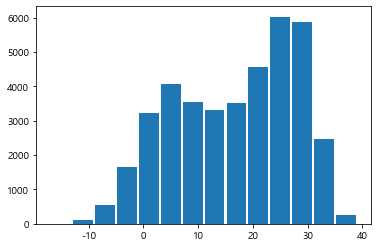

In [89]:
xrange = np.arange(-17, 39+1,4)

plt.hist(data = temp, x = '최고기온(℃)' , bins=xrange, rwidth=0.9)

plt.show()

## 실습 3. 위는 모든 날짜에 대한 데이터다. 
## 2014년도 부터의 데이터를 기준으로, bin의 범위를 4도로 만들어서, 히스토그램으로 보인다.

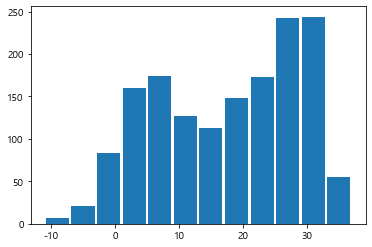

In [93]:
temp_after_2014 = temp.loc[ temp['날짜'] >= '2014' , ]
x2range = np.arange(-11, 36+4,4) # range 다시 설정


plt.hist(data = temp_after_2014, x = '최고기온(℃)' , bins=x2range, rwidth=0.9)
plt.show()

## 실습 4.  2017-08-01 ~ 2017-08-15 사이의 날짜별(x축) 최고기온(y축)을 스케터 시각화한다.

In [81]:
temp_01_15 = temp.loc[ (temp['날짜']<= '2017-08-15') & (temp['날짜'] >= '2017-08-01')  , ]

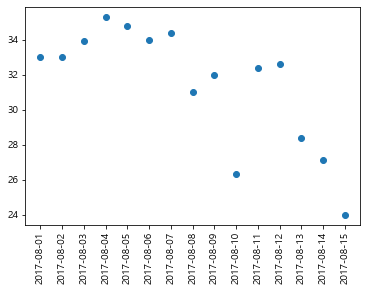

In [85]:
plt.scatter(data = temp_01_15, x = '날짜', y='최고기온(℃)')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# plotly 차트 많이 사용함. 웹 대시보드 만들때 많이 사용